## Introduction

#### Problem Statement

#### Motivation

#### Approach

#### Libraries

### Install Libraries

In [120]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [82]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------- -------------------------------- 2.4/12.8 MB 13.4 MB/s eta 0:00:01
     ---------------- ----------------------- 5.2/12.8 MB 13.3 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 13.5 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 13.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 13.6 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Zaid.Qarout\AppData\Roaming\nltk_data...
[nltk_

In [83]:
cd C:\Users\Zaid.Qarout\Toxic Comment Classification Challenge"

C:\Users\Zaid.Qarout\Toxic Comment Classification Challenge


C:\Users\Zaid.Qarout\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Importing Libraries

In [121]:
import numpy as np
import pandas as pd
import re
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
# import nltk

# nltk.download('stopwords')

from collections import Counter
from spacy import displacy
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

# from nltk.corpus import stopwords

## Variables

In [85]:
nlp = spacy.load('en_core_web_sm')  # Load the English tokenizer, tagger, parser, NER, and POS tagger

## Load Data

In [86]:
train_data_path = 'data/train.csv'
test_data_path = 'data/test.csv'

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

#### Observe the first 5 rows of each data set

In [87]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [88]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


#### Check the shape of the datasets

In [89]:
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)

Train shape (159571, 8)
Test shape (153164, 2)


#### Check the column names

In [90]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

#### Check for missing data

In [91]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#### View label distribution
Sort values to see the most common labels first

In [92]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df_train[labels].sum().sort_values(ascending=False)

toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

## Data Sanitation

### Clean the data

In [93]:
# def clean(text):
#     """
#     Function to clean the text data.
#     Args:
#         text (str): The text to be cleaned.
#         Returns: the cleaned text."""
#     text = text.lower()  # Convert to lowercase
#     text = text.strip()  # Remove leading and trailing whitespace
#     text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
#     text = re.sub(r'\d+', '', text)  # Remove digits
#     text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
#     return text

def clean(doc):
    """Function to clean the text data using spaCy.
    Args:
        doc (str): The text to be cleaned.
    Returns: the cleaned text as a string."""
    tokens = [token.text.lower() for token in doc 
              if token.is_alpha and not token.is_stop]  # Keep only alphabetic tokens and remove stop words
    return ' '.join(tokens)  # Join the tokens back into a single string

### Tokenise the data

In [94]:
# def tokenise(text):
#     """
#     Function to tokenise the text data.
#     Args:
#         text (str): The text to be tokenised.
#         Returns: a list of tokens."""
#     tokenised_text = re.findall(r"[a-zA-Z]+", text.lower()) # Extract words only including apostrophes
#     return tokenised_text

def tokenise(doc):
    """Function to tokenise the text data.
    Args:  
        doc (spacy.tokens.Doc): The processed text document.
    Returns: a list of tokens."""
    # Tokenise the document using spaCy
    tokens = [token.lemma_.lower()
              for token in doc
              if token.is_alpha and not token.is_stop] # Keep only alphabetic tokens, remove stop words, and lemmatise
    return tokens  # Return the list of tokens

### Sentence count

In [95]:
# def sentence_count(text):
#     """
#     Function to count the number of sentences in the text data.
#     Args:
#         text (str): The text to be processed.
#         Returns: the number of sentences."""
#     sentences = re.split(r'[.!?]+', text)  # Split by sentence-ending punctuation
#     return len([s for s in sentences if s.strip()])  # Count non-empty sentences

def sentence_count(doc):
    """ Function to count the number of sentences in the text data.
    Args:
        doc (spacy.tokens.Doc): The processed text document.
    Returns: the number of sentences."""
    return len(list(doc.sents))  # Count the number of sentences in the document

### Part-of-speech tagging (POS)
Show the grammatical role of each word (eg. noun, verb...)

In [96]:
def print_pos_tags(doc):
    """ Function to print the part-of-speech (POS) tags of the text data.
    Args:
        doc (spacy.tokens.Doc): The processed text document.
    Returns: None, but prints the POS tags."""
    # Print each token and its POS tag
    for token in doc:
        print(f"{token.text} - {token.pos_}")  # Print each token and its POS tag

### Name entity recognition (NER)
Finds named entities like countries, people, dates...

In [97]:
def print_ner(doc):
    """ Function to print named entities in the text data.
    Args:
        doc (spacy.tokens.Doc): The processed text document.
    Returns: None, but prints the named entities."""
    for ent in doc.ents:
        print(f"{ent.text} - {ent.label_}")  # Print each entity and its label

### Dependency parsing
Shows how each word depends on another in the sentence

In [98]:
def print_dependency_parse(doc):
    """ Function to print the dependency parse of the text data.
    Args:
        doc (spacy.tokens.Doc): The processed text document.
    Returns: None, but prints the dependency parse."""
    for token in doc:
        print(f"{token.text} - {token.dep_} - {token.head.text}")  # Print each token, its dependency relation, and its head

### Add sentiment scores


In [99]:
def get_sentiment_scores(text):
    """
    Function to get the sentiment scores of the text data.
    Args:
        text (str): The text to be processed.
    Returns: a dictionary with polarity and subjectivity scores."""
    blob = TextBlob(text)  # Create a TextBlob object
    return {'polarity': blob.sentiment.polarity, 'subjectivity': blob.sentiment.subjectivity}  # Return the sentiment scores as a dictionary

### Extract features

In [100]:
def extract_features(text):
    """ Function to extract features from the text data.
    Args:
        text (str): The text to be processed.
    Returns: a dictionary with various features extracted from the text."""
    
    if not isinstance(text, str) or not text.strip():
        # Return default values if input is not valid
        return {
            'cleaned_text': '',
            'tokens': [],
            'sentence_count': 0,
            'pos_tags': [],
            'ner': [],
            'dependency_parse': [],
            'sentiment_scores': {'polarity': 0.0, 'subjectivity': 0.0}
        }

    
    doc = nlp(text)  # Process the text with spaCy
    return {
        'cleaned_text': clean(doc),  # Cleaned text
        'tokens': tokenise(doc),  # Tokenised text
        'sentence_count': sentence_count(doc),  # Number of sentences
        'pos_tags': [(token.text, token.pos_) for token in doc],  # POS tags
        'ner': [(ent.text, ent.label_) for ent in doc.ents],  # Named entities
        'dependency_parse': [(token.text, token.dep_, token.head.text) for token in doc],  # Dependency parse
        'sentiment_scores': get_sentiment_scores(text)  # Sentiment scores
    }


### Apply satinisation methods

In [101]:
# # Clean and process the comment text
# df_train['clean_text'] = df_train['comment_text'].apply(clean)
# df_train['tokenised_text'] = df_train['clean_text'].apply(tokenise)
# df_train['sentence_count'] = df_train['comment_text'].apply(sentence_count)


In [ ]:
# ============ DEVELOPMENT MODE =========== #
# (a small sample to save time)

df_small = df_train.sample(n=5000, random_state=42)
features = df_small['comment_text'].apply(extract_features)
features_df = pd.json_normalize(features, sep='_')

df_small = df_small.reset_index(drop=True)
features_df = features_df.reset_index(drop=True)

df = pd.concat([df_small, features_df], axis=1)
# ========================================= #

# ============ FULL DATASET MODE (SUBMISSION) =========== #
# Uncomment this just before training and submission

# features = df_train['comment_text'].apply(extract_features)
# features_df = pd.json_normalize(features, sep='_')

# Align indices before combining

# df_train = df_train.reset_index(drop=True)
# features_df = features_df.reset_index(drop=True)

# Final working DataFrame for exploration

# df = pd.concat([df_train, features_df], axis=1)
# ======================================================== #


In [109]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text,tokens,sentence_count,pos_tags,ner,dependency_parse,sentiment_scores_polarity,sentiment_scores_subjectivity
0,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0,geez forgetful discussed marx anarchist wanted...,"[geez, forgetful, discuss, marx, anarchist, wa...",5,"[(Geez, PROPN), (,, PUNCT), (are, AUX), (you, ...","[(Geez, PERSON), (Marx, PERSON), (State, ORG),...","[(Geez, intj, are), (,, punct, are), (are, ROO...",-8.333333e-03,0.200000
1,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0,carioca rfa thanks support request adminship f...,"[carioca, rfa, thank, support, request, admins...",4,"[(Carioca, ADJ), (RFA, NOUN), (\n\n, SPACE), (...","[(31/4/1, CARDINAL)]","[(Carioca, compound, RFA), (RFA, compound, Tha...",1.000000e-01,0.600000
2,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0,birthday worries enjoy ur,"[birthday, worry, enjoy, ur]",1,"[("", PUNCT), (\n\n , SPACE), (Birthday, NOUN),...",[],"[("", punct, 's), (\n\n , dep, ""), (Birthday, c...",3.250000e-01,0.750000
3,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0,pseudoscience category assuming article pseudo...,"[pseudoscience, category, assume, article, pse...",4,"[(Pseudoscience, NOUN), (category, NOUN), (?, ...",[],"[(Pseudoscience, compound, category), (categor...",1.266667e-01,0.398333
4,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0,phrase exists provided search engine mentioned...,"[phrase, exist, provide, search, engine, menti...",1,"[((, PUNCT), (and, CCONJ), (if, SCONJ), (such,...",[],"[((, punct, provided), (and, cc, provided), (i...",0.000000e+00,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ba6f9b741648e4e4,"""\n\nIn response to Bduke's question 2 above, ...",0,0,0,0,0,0,response bduke question think difficult wikipe...,"[response, bduke, question, think, difficult, ...",7,"[("", PUNCT), (\n\n, SPACE), (In, ADP), (respon...","[(Bduke, GPE), (2, CARDINAL), (Guiding, ORG), ...","[("", punct, think), (\n\n, dep, ""), (In, prep,...",-3.965082e-18,0.571429
4996,5c827588ebf39fe6,"""\nSupport as above Slash """,0,0,0,0,0,0,support slash,"[support, slash]",1,"[("", PUNCT), (\n, SPACE), (Support, PROPN), (a...","[(Slash, GPE)]","[("", punct, Support), (\n, dep, ""), (Support, ...",0.000000e+00,0.100000
4997,e52f35b373fa6bbb,REDIRECT Talk:Magar class amphibious warfare v...,0,0,0,0,0,0,redirect talk magar class amphibious warfare v...,"[redirect, talk, magar, class, amphibious, war...",1,"[(REDIRECT, PROPN), (Talk, NOUN), (:, PUNCT), ...",[],"[(REDIRECT, compound, Talk), (Talk, ROOT, Talk...",0.000000e+00,0.000000
4998,7b681dbd3aa67ef6,"""\n\nSanger & Sangists\nI've added the """""""" te...",0,0,0,0,0,0,sanger sangists added template article sanger ...,"[sanger, sangists, add, template, article, san...",4,"[("", PUNCT), (\n\n, SPACE), (Sanger, PROPN), (...","[(Sanger & Sangists, ORG), (Wikipedia, ORG), (...","[("", punct, added), (\n\n, dep, ""), (Sanger, n...",2.666667e-01,0.550000


### Get the top occuring words in a dictionary
I am skipping this for now but might want to revisit it later

In [104]:
# stop_words = nlp.Defaults.stop_words  # Get the default stop words from spaCy

# top_words_dict = {}

# for label in labels:
#     subset = df_train[df_train[label] == 1]  # Create a subset of the training data for the current label

#     all_tokens = []  # List to hold all tokens for the current label
#     subset['tokenised_text'].apply(lambda tokens: all_tokens.extend(
#         [token for token in tokens if token not in stop_words]
#     ))  # Extend the list with tokens from each comment

#     common = Counter(all_tokens).most_common(20)
#     top_words_dict[label] = [word for word, _ in common]  # Get the top 20 words for the current label

# # top_words_dict = {}

# # for label in labels:
# #     subset = df_train[df_train[label] == 1] # Create a subset of the training data for the current label

# #     tokenised_comments = []  # List to hold tokenised comments
# #     # Clean and tokenise each comment in the subset
# #     for comment in subset['comment_text']:
# #         cleaned_comment = clean(comment)
# #         tokenised_comment = tokenise(cleaned_comment)
# #         tokenised_comments.extend(tokenised_comment)
    
# #     common = Counter(tokenised_comments).most_common(20) # Get the top 20 words for the current label
# #     top_words_dict[label] =[word for word, _ in common]  

# # top_words_df = pd.DataFrame.from_dict(top_words_dict, orient='index').transpose()
# # top_words_df


In [105]:
# top_words_dict = pd.DataFrame.from_dict(top_words_dict, orient='index').transpose()
# top_words_dict

## Modelling

### TF-IDF (Term Frequency - Inverse Document Frequency)

In [131]:
# X is input features and y is the output labels

df = df.dropna(subset=['cleaned_text'])
X = df['cleaned_text']  # Features: cleaned text
y = df[labels]  # Target labels

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(
        X, y, test_size=0.2, random_state=42
    ) # Split the data into training and testing sets

# Vectorise the text data using TF-IDF
vectoriser = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectoriser.fit_transform(X_train_lg)  # Fit and transform the training data
X_test_vec = vectoriser.transform(X_test_lg)  # Transform the testing data

## Models

### Logistic Regression

In [141]:
model_lg = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))  # Create a multi-label classifier
model_lg.fit(X_train_vec, y_train_lg)  # Train the model on the training data

y_pred_lg = model_lg.predict(X_test_vec)  # Make predictions on the test data

# Some samples in your test set have no true labels (i.e. [0, 0, 0, 0, 0, 0]).
# Your model also predicted nothing for those samples.
# Metrics like precision/recall become "undefined" in those cases.
# ✅ This is normal for multi-label tasks. You can safely suppress it by passing:
print(classification_report(y_test_lg, y_pred_lg, target_names=labels, zero_division=0))
print("Macro-average F1-score:", f1_score(y_test_lg, y_pred_lg, average='macro'))

               precision    recall  f1-score   support

        toxic       0.57      0.64      0.60        91
 severe_toxic       0.07      0.17      0.10         6
      obscene       0.86      0.70      0.77        53
       threat       0.00      0.00      0.00         3
       insult       0.58      0.70      0.64        44
identity_hate       0.27      0.50      0.35        12

    micro avg       0.56      0.64      0.60       209
    macro avg       0.39      0.45      0.41       209
 weighted avg       0.61      0.64      0.61       209
  samples avg       0.05      0.05      0.05       209

Macro-average F1-score: 0.4106643394943221


## Visualisation

In [142]:
def plot_predictions(y_true, y_pred, labels, model_name):
    """Function to plot the predictions of the model.
    Args:
        y_true (pd.DataFrame): True labels.
        y_pred (np.ndarray): Predicted labels.
        labels (list): List of label names.
    Returns: None, but displays a bar plot of the predictions."""
    
    y_test_counts = np.sum(y_true.values, axis=0)
    y_pred_counts = np.sum(y_pred, axis=0)

    x = np.arange(len(labels))  # label positions

    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, y_test_counts, width=0.4, label='True', color='skyblue')
    plt.bar(x + 0.2, y_pred_counts, width=0.4, label='Predicted', color='salmon')

    plt.xticks(x, labels, rotation=45)
    plt.ylabel('Number of Samples')
    plt.title('True vs Predicted Label Counts ' + model_name)
    plt.legend()
    plt.tight_layout()
    plt.show()

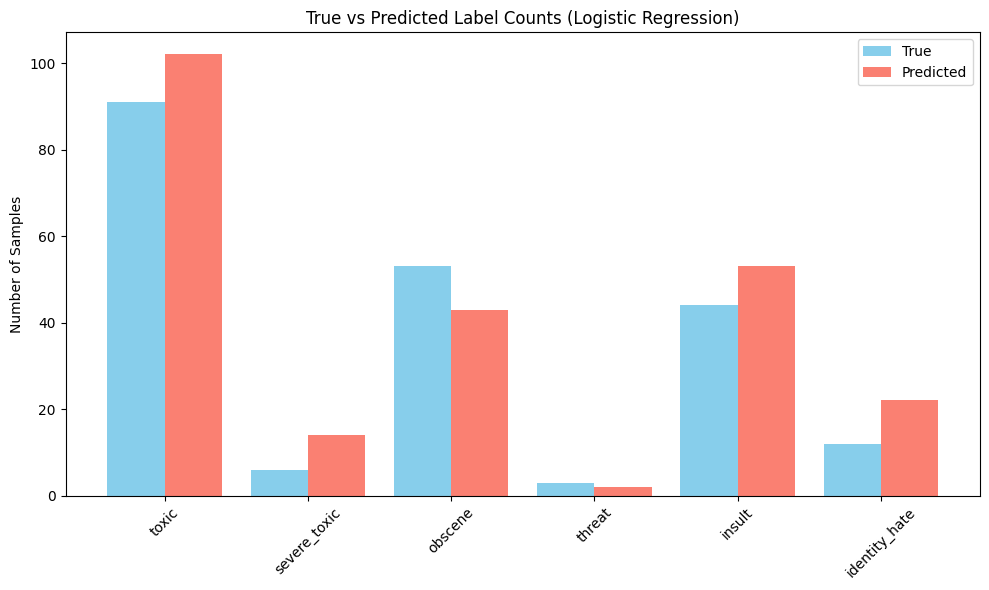

In [143]:
plot_predictions(y_test_lg, y_pred_lg, labels, "(Logistic Regression)")